### 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

#### Answer: 

the constant is 873 so the average family spends at least that amount on recreation. the anual incom is a squared feature so it increases exponentially the children is a dummy variable so the having or not having children can . be treated as the addition of a constant. 

- I would like to see the tests for significance.  

- first I would try to include the number and age of the children in the family. 
- Number of vacation days from work could be an important indicator for recreational spending 
- if the family has pets they may be less likely to leave their home due to the need for a pet sitter
- Amount of debt could also play a large role along with living expenses. 



## 2. Weather model
In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the weatherinszeged table from Thinkful's database.
- Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
- Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.

In [12]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from sklearn import linear_model 
import warnings
import statsmodels.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')


In [13]:

#data base credentials 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

#create engine to access database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

#creat dataframe from data 
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine)

#dispose of engine
engine.dispose() 
#As in earlier assignments, be sure to close the database connection 
# after initially pulling in your data.



In [14]:
weather_df.columns



Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature', 'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover', 'pressure', 'dailysummary'], dtype='object')

In [15]:
weather_df['diff_in_appar_temp'] = weather_df['apparenttemperature']-weather_df['temperature']

In [16]:
Y = weather_df['diff_in_appar_temp']

X = weather_df[['windspeed','humidity']]

In [19]:
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     diff_in_appar_temp   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:12:22   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the Stats models summary our coefficients are significant with P values of Zero for wind speed humidity and the y intercept 
$$= 2.4381	-0.1193*windspeed -3.0292*Humidity	 $$

In [20]:
V = weather_df['diff_in_appar_temp']

weather_df['wetnessofwind'] = weather_df['windspeed']*weather_df['humidity']

W = weather_df['wetnessofwind']

In [21]:
W = sm.add_constant(W)

results = sm.OLS(V,W).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     diff_in_appar_temp   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                 4.426e+04
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:17:48   Log-Likelihood:            -1.6861e+05
No. Observations:               96453   AIC:                         3.372e+05
Df Residuals:                   96451   BIC:                         3.372e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3511      0.008     43.171      0.000       0.335       0.367
wetnessofwind    -0.1870      0.001   -210.380      0.000      -0.189      -0.185
==============================================================================
Omnibus:                     2785.669   Durbin-Watson:                   0.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4041.543
Skew:                          -0.307   Prob(JB):                         0.00
Kurtosis:                       3.793   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the P values stayed at Zero however the R squared value increased by 3% this appears to be a slightly better metric 


$$= 0.3511	-0.1870	*wetnessofwind	 $$

###  3. House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

#create connection to database based on credentials 
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# create a dataframe from the imported data
house_price_data = pd.read_sql_query('select * from houseprices',con=engine)

#dispose of the connection 
engine.dispose()

In [26]:
house_price_data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [27]:
# Y is the target variable
U = house_price_data['saleprice']
# X is the feature set which includes
# is_male and is_smoker variables
T = house_price_data[['lotarea','grlivarea','yearbuilt','garagearea']]

T = sm.add_constant(T)

results = sm.OLS(U,T).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     812.4
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:44:19   Log-Likelihood:                -17687.
No. Observations:                1460   AIC:                         3.538e+04
Df Residuals:                    1455   BIC:                         3.541e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.623e+06   8.52e+04    -19.053      0.000   -1.79e+06   -1.46e+06
lotarea        0.6622      0.121      5.477      0.000       0.425       0.899
grlivarea     79.3633      2.550     31.118      0.000      74.360      84.366
yearbuilt    832.0119     43.844     18.976      0.000     746.007     918.017
garagearea    78.2947      6.882     11.376      0.000      64.794      91.795
==============================================================================
Omnibus:                      375.654   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20536.558
Skew:                           0.262   Prob(JB):                         0.00
Kurtosis:                      21.366   Cond. No.                     1.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

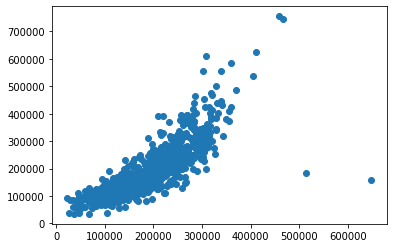

In [28]:
house_price_data['REG']= -1.623e+06 + 0.6622*house_price_data['lotarea'] +79.3633*house_price_data['grlivarea']+832.0119*house_price_data['yearbuilt']+78.2947*house_price_data['garagearea']

plt.scatter(house_price_data['REG'],house_price_data['saleprice'])



In [ ]:
All features are significant acording to the test